In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt

my_data = datasets.load_boston()

print(my_data.keys())
print(my_data.data.shape)
print(my_data.feature_names)
print(my_data.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [2]:
df = pd.DataFrame(my_data.data, columns=my_data.feature_names)

df.head()
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(my_data.target, columns=["MEDV"])

In [3]:
X = df
y=my_data.target


In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)         #Fits the linear model

In [5]:
predictions = lm.predict(X)          #predict y using linear model coefficients

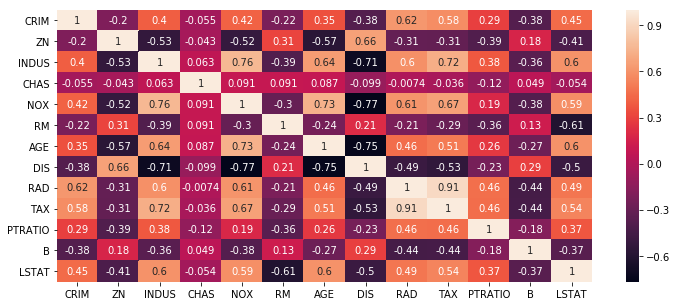

In [6]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(), annot = True)
plt.show()

plt.scatter(y,predictions)
plt.xlabel("Prices")
plt.ylabel("Predicted Prces")
plt.title("Prices vs Predicted Prices")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pred = lm.predict(X_test)
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

Linear Regression R squared": 0.7109


In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

error_mse = mean_squared_error(y_pred, y_test)
print('Mean absolute error',mean_absolute_error(y_pred, y_test))
print('Mean square error',error_mse)
error_rmse = np.sqrt(error_mse)
print('Linear Regression RMSE: %.4f' % error_rmse)

Mean absolute error 3.1656052314924854
Mean square error 21.54021894393158
Linear Regression RMSE: 4.6411
